In [1]:
using TSSM

In [2]:
function W(x,y) 
    gamma_x = 0.8
    gamma_y = 1.2
    (gamma_y^2-gamma_x^2)*y^2/2
end
gamma_r = 0.8
Omega = 0.5
beta = 100
m = SchroedingerGeneralizedLaguerre2D(100,100, gamma_r, Omega, potential=W, cubic_coupling=beta)
psi = wave_function(m)

TSSM.WfSchroedingerGeneralizedLaguerre2D{Float64}(Ptr{Void} @0x0000000003be4310,TSSM.SchroedingerGeneralizedLaguerre2D{Float64}(Ptr{Void} @0x0000000003d275d0))

In [3]:
psi_0(x,y) = (x+y*1im)*exp(-(x^2+y^2)/2)/sqrt(pi)
set!(psi,psi_0)

In [4]:
norm(psi)

0.9999999999999999

In [5]:
E = kinetic_energy(psi)+potential_energy(psi)+interaction_energy(psi)

5.518873577297384

In [6]:
condensate_width_squared(x,y) = x^2+y^2
sqrt(observable(psi, condensate_width_squared))

1.414213562373092

In [7]:
include("time_stepper.jl");

In [8]:
palindromic_scheme_56 = PalindromicScheme(
          ( 0.201651044312324230,   0.578800656272664932, 
            0.562615975356569200,   0.273128836056524479, 
            0.253874038247554845,  -0.102733803148432142, 
           -0.835351693190370636,   0.068014946093165092, 
            0.068014946093165092,  -0.835351693190370636,
           -0.102733803148432142,   0.253874038247554845, 
            0.273128836056524479,   0.562615975356569200, 
            0.578800656272664932,   0.201651044312324230 ),            
            5 )

PalindromicScheme((0.20165104431232422,0.578800656272665,0.5626159753565692,0.2731288360565245,0.25387403824755483,-0.10273380314843214,-0.8353516931903706,0.0680149460931651,0.0680149460931651,-0.8353516931903706,-0.10273380314843214,0.25387403824755483,0.2731288360565245,0.5626159753565692,0.578800656272665,0.20165104431232422),5)

In [9]:
t0 = 0
tend = 10
tol = 1e-5

set!(psi,psi_0)

stepsizes=[0.0]
times=[0.0]
condensate_widths=[0.0]
told=0.0
nsteps=0

for t in adaptive_time_stepper(psi, t0, tend, 0.01, tol, palindromic_scheme_56, "AB")
    println("step=",nsteps, " t=", t)
    push!(stepsizes,t-told)
    push!(times,t)
    push!(condensate_widths, sqrt(observable(psi, condensate_width_squared)))
    told=t
    nsteps=nsteps+1
end

step=0 t=0.01
step=1 t=0.05
t=  5.000000000e-02  err=   5.22028458e+00  dt=   3.04561144e-02  rejected...
t=  5.000000000e-02  err=   1.53859047e+00  dt=   2.55111380e-02  rejected...
step=2 t=0.07551113800199549
t=  7.551113800e-02  err=   2.82045302e+00  dt=   1.76185913e-02  rejected...
t=  7.551113800e-02  err=   1.62002384e+00  dt=   1.46316552e-02  rejected...
t=  7.551113800e-02  err=   1.14878561e+00  dt=   1.28675580e-02  rejected...
step=3 t=0.08837869603366397
t=  8.837869603e-02  err=   1.37912023e+00  dt=   1.00213769e-02  rejected...
t=  8.837869603e-02  err=   1.09184565e+00  dt=   8.88811568e-03  rejected...
step=4 t=0.09726681171641141
t=  9.726681172e-02  err=   1.11905509e+00  dt=   7.16274427e-03  rejected...
step=5 t=0.10442955598723468
t=  1.044295560e-01  err=   1.05264142e+00  dt=   5.79595823e-03  rejected...
step=6 t=0.11022551421363708
step=7 t=0.11551506265173905
step=8 t=0.12030462237502464
step=9 t=0.12463485687815425
step=10 t=0.1285598138253241
step=11 t

In [10]:
using PyPlot

/home/hofi/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


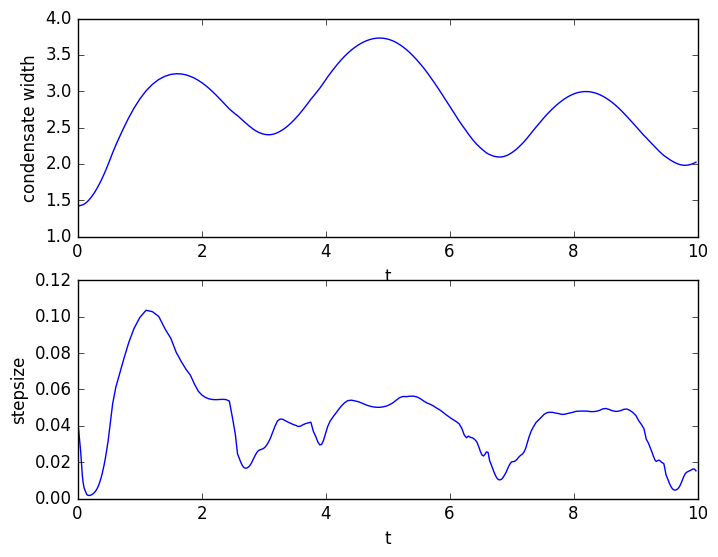

PyObject <matplotlib.text.Text object at 0x7efee75aa410>

In [11]:
subplot(2, 1, 1)
plot(times[1:end-2], condensate_widths[2:end-1])
xlabel("t")
ylabel("condensate width")

subplot(2, 1, 2)
plot(times[1:end-2], stepsizes[2:end-1])
xlabel("t")
ylabel("stepsize")